### Install & import required libraries




In [ ]:
!pip install scikit-plot

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm 
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report,auc
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import MinMaxScaler

import scikitplot as skplt
from scikitplot.metrics import plot_confusion_matrix, plot_roc

import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [ ]:
df = pd.read_excel('/content/Tourism.xlsx', sheet_name='Tourism')

#EDA

## Understanding the Data

In [ ]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

df.columns

There are 4888 rows and 20 columns


Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

Let's have a look at the dataset:

In [ ]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


Datset details:

**CustomerID**: Unique customer ID          
**ProdTaken**: Whether the customer has purchased a package or not (0: No, 1: Yes) - Target variable                 
**Age**: Age of customer                
**TypeofContact**: How customer was contacted (Company Invited or Self Inquiry)                    
**CityTier**: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3                     
**Occupation**: Occupation of customer                           
**Gender**: Gender of customer                           
**NumberOfPersonVisiting**: Total number of persons planning to take the trip with the customer                       
**PreferredPropertyStar**: Preferred hotel property rating by customer     
**MaritalStatus**: Marital status of customer       
**NumberOfTrips**: Average number of trips in a year by customer            
**Passport**: The customer has a passport or not (0: No, 1: Yes)            
**OwnCar**: Whether the customers own a car or not (0: No, 1: Yes)           
**NumberOfChildrenVisiting**: Total number of children with age less than 5 planning to take the trip with the customer              
Designation: Designation of the customer in the current organization            
**MonthlyIncome**: Gross monthly income of the customer                    
**PitchSatisfactionScore**: Sales pitch satisfaction score             
**ProductPitched**: Product pitched by the salesperson                   
**NumberOfFollowups**: Total number of follow-ups has been done by the salesperson after the sales pitch              
**DurationOfPitch**: Duration of the pitch by a salesperson to the customer                


In [ ]:
df.shape

(4888, 20)

**Exploratory Data Analysis  (EDA)**

In [ ]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


### Univariate Analysis

Let's us look at the TypeofContact variable

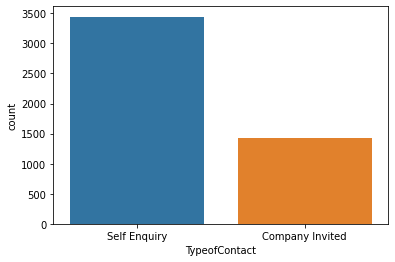

In [ ]:
# Count plot for TypeofContact
sns.countplot(x='TypeofContact', data=df)

It seems the customers who contacted travel agency by self are more than those who got invitation from Company.

Let's look at the CityTier

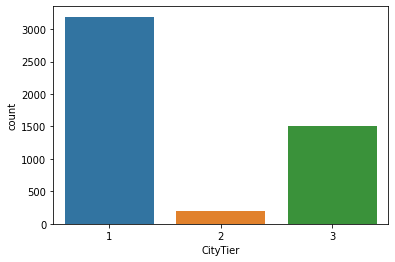

In [ ]:
# Count plot for CityTier
sns.countplot(x='CityTier', data=df)

It appears the number of customers are more from CityTier 1 followed by CityTier 3. 

Let's look at the Occupation variable:

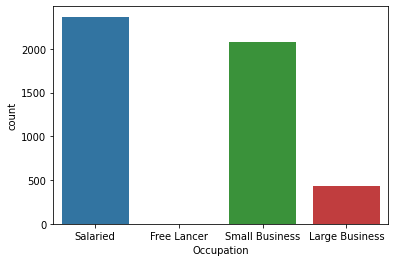

In [ ]:
# Count plot for Occupation
sns.countplot(x='Occupation', data=df)

Salaried people more than any other category followed by Small Business.

Let's look at the Gender variable:

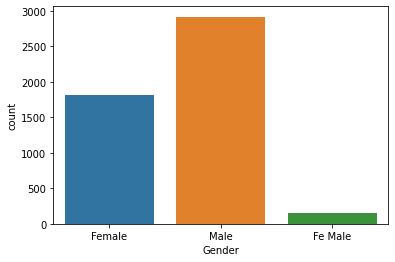

In [ ]:
# Count plot for Gender
sns.countplot(x='Gender', data=df)

In our dataset, Male count is higher than Female & Fe Male.

Let's look at the ProductPitched feature

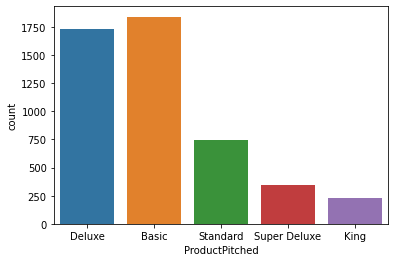

In [ ]:
# Count plot for ProductPitched
sns.countplot(x='ProductPitched', data=df)

The customers are enquired more about Basic & Deluxe products than any category.

Let's have a look at the MaritalStatus :

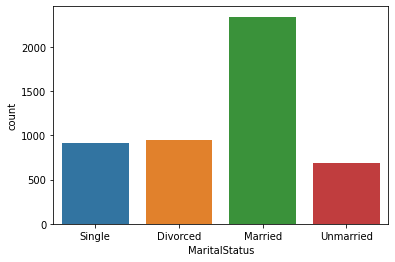

In [ ]:
# Countplot for MaritalStatus
sns.countplot(x='MaritalStatus', data= df)

As expected couples are more in our dataset than any other category.

Let's look at the Passport feature :

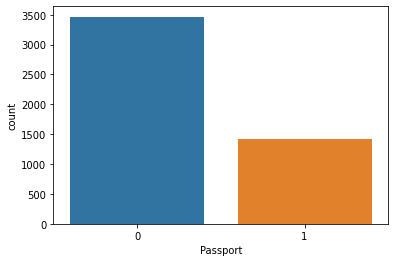

In [ ]:
# Count plot for Passport
sns.countplot(x='Passport', data= df)

Customers without passport are more than those with passport. It seems domestic people more likely buy a travel package.

Let's look at the Own car feature :

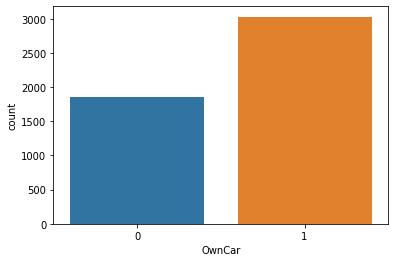

In [ ]:
# Count plot for OwnCar
sns.countplot(x='OwnCar', data= df)

The customers having own car are enquired about travel package more than those who don't own a car.

Let's look at the Designation feature :



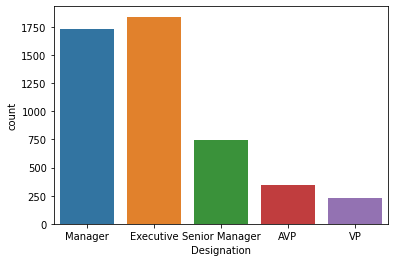

In [ ]:
# Count plot for Designation 
sns.countplot(x='Designation', data= df)

It seems Manager & Executives are more likely to enquire about travel package than other categories.

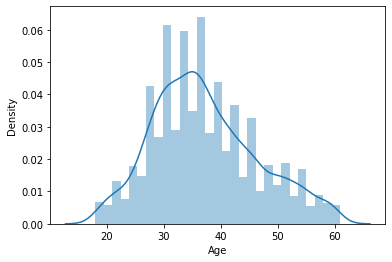

In [ ]:
# Distribution plot for Age
sns.distplot(df.Age)

It seems age is ditributed normally.

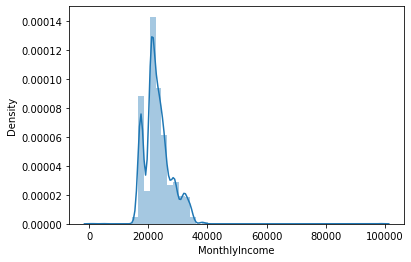

In [ ]:
# Distribution plot for MonthlyIncome
sns.distplot(df['MonthlyIncome'])

MonthlyIncome data is left skewed & is distributed all the values in the range of 18000 & 40000.

**Bivariate Analysis**

Relation between MonthlyIncome & Gender

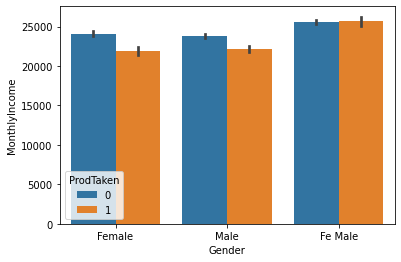

In [ ]:
# Bar plot
sns.barplot(x='Gender',y='MonthlyIncome', hue='ProdTaken', data=df)

Insights:
* Monthly Income of Fe Male category is more than any other category having same proportion of buying & not buying a travel package.

Relation between MonthlyIncome & Occupation by ProdTaken

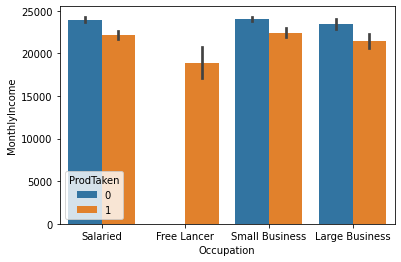

In [ ]:
# Bar plot
sns.barplot(x='Occupation',y='MonthlyIncome', hue='ProdTaken', data=df)

Insights:         
*  MonthlyIncome of Salaried & Small Business people are almost same having more number who are not purchasing the package than those who are buying a package.
* Surprisingly, Freelancers have 100% purchase rate (All freelancers bought the package)

Relation between MonthlyIncome & MaritalStatus by Gender

Relation between MonthlyIncome & ProductPitched by ProdTaken

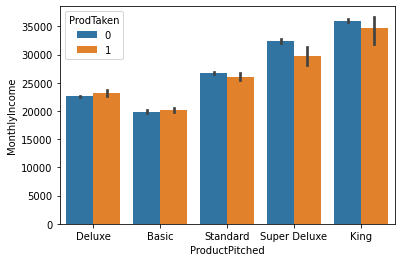

In [ ]:
# Bar plot
sns.barplot(x='ProductPitched',y='MonthlyIncome', hue='ProdTaken', data= df)

Insights:
* Proportion of Customers who bought King product & those who didn't is higher than any other product pitched by Sales person.

Relation between MonthlyIncome & ProductPitched by Occupation

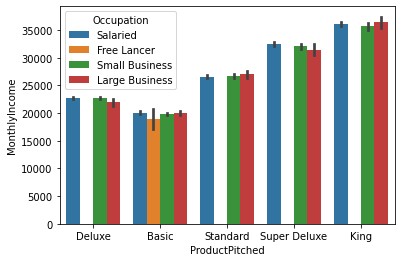

In [ ]:
# Bar plot
sns.barplot(x='ProductPitched',y='MonthlyIncome', hue='Occupation', data= df)

Insights:
* All Freelancers bought Basic travel package.
* All categories of people except Freelancer have bought every product that pitched by Sales person.

Relation between MonthlyIncome & Age

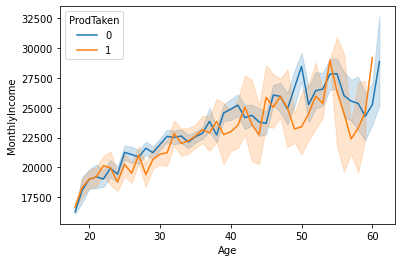

In [ ]:
# Line plot
sns.lineplot(x='Age',y='MonthlyIncome', data= df.dropna(), hue = 'ProdTaken')

Insights:   
*  MonthlyIncome is changing non-linearly with Age for both the customers who bought the package & who didn't.

Relation between MonthlyIncome & NumberOfTrips

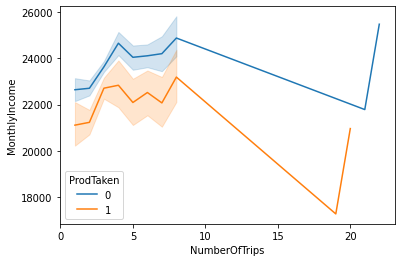

In [ ]:
# Line plot
sns.lineplot(x='NumberOfTrips',y='MonthlyIncome', data= df.dropna(), hue = 'ProdTaken')

Insights:    
*  Customers who have high number of trips have less Monthly Income who bought travel package (< 22000) than who didn't buy the package ( >22000).

Relation between MonthlyIncome & PitchSatisfactionScore

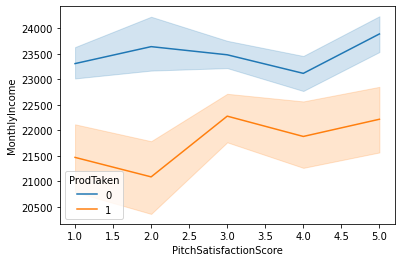

In [ ]:
# Line plot
sns.lineplot(x='PitchSatisfactionScore',y='MonthlyIncome', data= df.dropna(), hue = 'ProdTaken')

Insights:        
*  MonthlyIncome of customers who bought travel package is less than the who didn't irrespective of Pitch satisfaction score.

**Data pre-processing**

**Missing value analysis**

Check if any null values in the dataset.

In [ ]:
null_values = df.isnull().sum()/len(df)
null_values

CustomerID                  0.000000
ProdTaken                   0.000000
Age                         0.046236
TypeofContact               0.005115
CityTier                    0.000000
DurationOfPitch             0.051350
Occupation                  0.000000
Gender                      0.000000
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.009206
ProductPitched              0.000000
PreferredPropertyStar       0.005319
MaritalStatus               0.000000
NumberOfTrips               0.028642
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    0.013502
Designation                 0.000000
MonthlyIncome               0.047668
dtype: float64

The columns **Age, TypeofContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfTrips, NumberOfChildrenVisiting, & MonthlyIncome** contains null values.

We will drop missing values from dataset as we have sufficient data to build prediction models.

In [ ]:
# Drop missing values
df = df.dropna()

In [ ]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0


In [ ]:
# Reset index
df = df.reset_index(drop = True)

In [ ]:
# Shape of dataset after dropping missing values
df.shape

(4128, 20)

**Typecast**

In [ ]:
# Check data types
df.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

Convert object types to category.

In [ ]:
# Object to category
cols = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']
for col in cols:
  df[col] = df[col].astype('category')

In [ ]:
df.dtypes

CustomerID                     int64
ProdTaken                      int64
Age                          float64
TypeofContact               category
CityTier                       int64
DurationOfPitch              float64
Occupation                  category
Gender                      category
NumberOfPersonVisiting         int64
NumberOfFollowups            float64
ProductPitched              category
PreferredPropertyStar        float64
MaritalStatus               category
NumberOfTrips                float64
Passport                       int64
PitchSatisfactionScore         int64
OwnCar                         int64
NumberOfChildrenVisiting     float64
Designation                 category
MonthlyIncome                float64
dtype: object

**Encode categorical features**


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for col in cols:
  df[col] = le.fit_transform(df[col])

In [ ]:
# Check df
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,1,3,6.0,2,1,3,3.0,1,3.0,2,1.0,1,2,1,0.0,2,20993.0
1,200001,0,49.0,0,1,14.0,2,2,3,4.0,1,4.0,0,2.0,0,3,1,2.0,2,20130.0
2,200002,1,37.0,1,1,8.0,0,2,3,4.0,0,3.0,2,7.0,1,3,0,0.0,1,17090.0
3,200003,0,33.0,0,1,9.0,2,1,2,3.0,0,3.0,0,2.0,1,5,1,1.0,1,17909.0
4,200005,0,32.0,0,1,8.0,2,2,3,3.0,0,3.0,2,1.0,0,5,1,1.0,1,18068.0


**Check duplicates if any**

In [ ]:
df. duplicated().sum()

0

**Outlier treatment**

Using scipy.stats.zscore() to remove outliers from dataset if they are present.

In [ ]:
from scipy.stats import zscore

In [ ]:
# calculate z-scores of `df`
z_scores = zscore(df)
# Absolute values
abs_z_scores = np.abs(z_scores)

In [ ]:
# Check outliers, if zscore>3 means the data point is an outlier
# Let's find outliers
filtered_entries = (abs_z_scores > 3).all(axis=1)
df_outliers = df[filtered_entries]
print(f'Number of outliers present in our dataset is {len(df_outliers)}')

Number of outliers present in our dataset is 0


It seems no outlier is present in our data.

### Distribution of classes in ProdTaken attribute (target variable)

Count of ProdTaken :
 0    3331
1     797
Name: ProdTaken, dtype: int64
percentage of ProdTaken count :
 0    80.692829
1    19.307171
Name: ProdTaken, dtype: float64
CPU times: user 88.7 ms, sys: 815 µs, total: 89.5 ms
Wall time: 92.1 ms


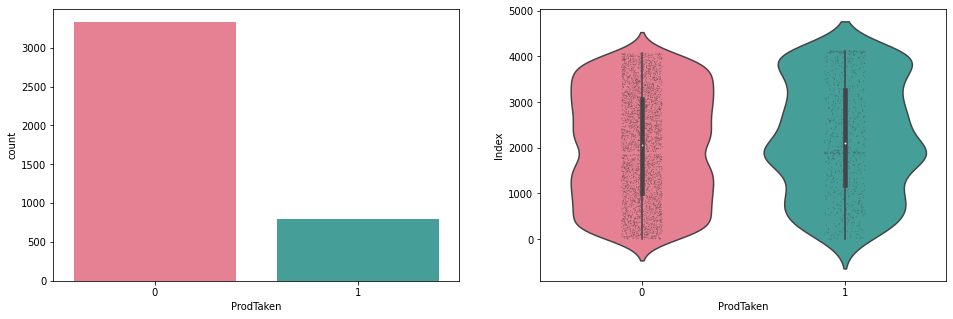

In [ ]:
%%time
#ProdTaken count
df_label=df['ProdTaken'].value_counts()
print('Count of ProdTaken :\n',df_label)
#Percentage of label count
per_label=df['ProdTaken'].value_counts()/len(df)*100
print('percentage of ProdTaken count :\n',per_label)

#Countplot and violin plot for label
fig,ax=plt.subplots(1,2,figsize=(16,5))
sns.countplot(df.ProdTaken.values,ax=ax[0],palette='husl')
sns.violinplot(x=df.ProdTaken.values,y=df.index.values,ax=ax[1],palette='husl')
sns.stripplot(x=df.ProdTaken.values,y=df.index.values,jitter=True,color='black',linewidth=0.5,size=0.5,alpha=0.5,ax=ax[1],palette='husl')
ax[0].set_xlabel('ProdTaken')
ax[1].set_xlabel('ProdTaken')
ax[1].set_ylabel('Index')

Take aways:

* We have imbalanced data, where 80% of the data is the number of customers who have not purchased a package and 20% of the data is those customers who purchased the package..
* If you look at the jitter in violin plot, we can say that labels distributed uniformly over the indexs of the dataframe and Also we can observe the imbalanced class distribution where the  class 0 is most densely distributed than the class 1.

In [ ]:
# Create features & target 
X_features = df.drop('ProdTaken',axis=1)
y = df['ProdTaken'].astype('uint8')

### Split the dataset for training, & testing.

In [ ]:
#Split the data into train (80%), & test set (20%).
X_train,X_test,y_train,y_test=train_test_split(X_features, y, random_state=42, test_size=0.2)

In [ ]:
print(f'Train dataset shape : {X_train.shape}, {y_train.shape}')
print(f'Test dataset shape : {X_test.shape}, {y_test.shape}')

Train dataset shape : (3302, 19), (3302,)
Test dataset shape : (826, 19), (826,)


### Feature selection

**Chi-Square test for selecting best features**

A chi-square test is used in statistics to test the independence of two events. In our case, we used to determine the relationship between independent variables (features) & dependent variable (response or target). In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# Extract top 15 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
bf = bestfeatures.fit(X_train, y_train)
dfscores = pd.DataFrame(bf.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

In [ ]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score'] 
print(featureScores.nlargest(15,'Score'))

                  features         Score
18           MonthlyIncome  52249.242996
1                      Age    170.231891
13                Passport    164.737982
4          DurationOfPitch    128.980641
9           ProductPitched    102.936464
0               CustomerID     93.003982
11           MaritalStatus     45.520769
17             Designation     16.084924
3                 CityTier     12.200236
8        NumberOfFollowups     11.256701
14  PitchSatisfactionScore      6.892771
10   PreferredPropertyStar      5.534373
2            TypeofContact      2.846328
5               Occupation      1.933013
6                   Gender      1.018260


In [ ]:
best_features = featureScores.nlargest(15,'Score')
best_columns = best_features.features.tolist()
# Top 15 features
best_columns

['MonthlyIncome',
 'Age',
 'Passport',
 'DurationOfPitch',
 'ProductPitched',
 'CustomerID',
 'MaritalStatus',
 'Designation',
 'CityTier',
 'NumberOfFollowups',
 'PitchSatisfactionScore',
 'PreferredPropertyStar',
 'TypeofContact',
 'Occupation',
 'Gender']

**MonthlyIncome** feature plays most important role in deciding the purchase of the travel package.

In [ ]:
# Update X_train, X_test for best_columns
X_train_best = X_train[best_columns]
X_test_best = X_test[best_columns]

In [ ]:
X_train_best.head()

,MonthlyIncome,Age,Passport,DurationOfPitch,ProductPitched,CustomerID,MaritalStatus,Designation,CityTier,NumberOfFollowups,PitchSatisfactionScore,PreferredPropertyStar,TypeofContact,Occupation,Gender
1513,17741.0,26.0,1,23.0,0,201923,1,1,2,3.0,5,3.0,0,2,1
479,21062.0,42.0,1,6.0,1,200597,0,2,1,4.0,3,3.0,1,2,1
3965,29654.0,56.0,0,9.0,3,204701,1,3,1,4.0,1,4.0,0,2,2
3932,23647.0,27.0,0,36.0,1,204662,3,2,3,6.0,3,5.0,0,3,2
2258,21221.0,37.0,0,9.0,0,202821,0,1,1,4.0,5,3.0,1,2,1


### Correlation matrix

Plot correlation matrix using heatmap to check how the features are correlated.

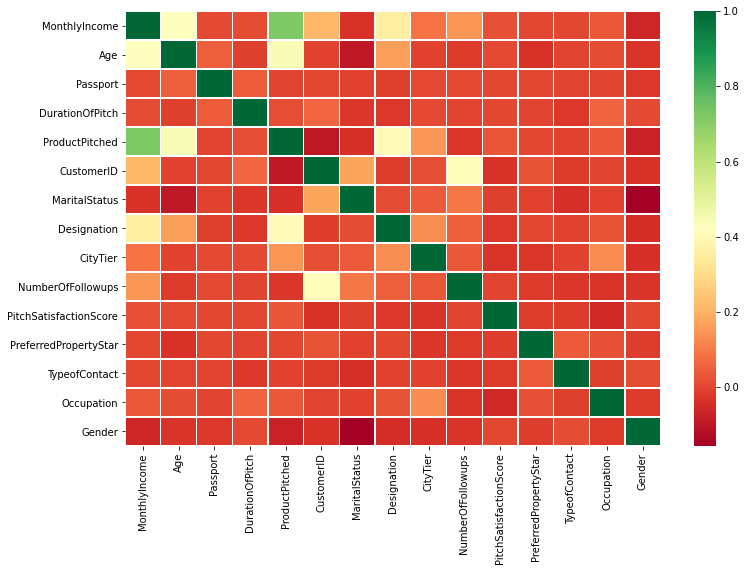

In [ ]:
plt.figure(figsize = (12,8))
df_corr = X_train_best.corr()
sns.heatmap(df_corr,fmt = "", cmap = "RdYlGn", linewidth = 0.30)
plt.show()

Insights:
* It seems features have no high correlation between them.

### Data Scaling

In [ ]:
# Scale our continuous data in the range of 0 & 1
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# fit the train data
scaler.fit(X_train_best)

# Transform the data
X_train_scaled = scaler.transform(X_train_best)
X_test_scaled = scaler.transform(X_test_best)

In [ ]:
# Create a dataframe for scaled train & test data
x_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_best.columns)
x_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_best.columns)

In [ ]:
x_train_scaled.head()

,MonthlyIncome,Age,Passport,DurationOfPitch,ProductPitched,CustomerID,MaritalStatus,Designation,CityTier,NumberOfFollowups,PitchSatisfactionScore,PreferredPropertyStar,TypeofContact,Occupation,Gender
0,0.171390,0.186047,1.0,0.147541,0.00,0.393573,0.333333,0.25,0.5,0.4,1.0,0.0,0.0,0.666667,0.5
1,0.205389,0.558140,1.0,0.008197,0.25,0.122186,0.000000,0.50,0.0,0.6,0.5,0.0,1.0,0.666667,0.5
2,0.293352,0.883721,0.0,0.032787,0.75,0.962137,0.333333,0.75,0.0,0.6,0.0,0.5,0.0,0.666667,1.0
3,0.231854,0.209302,0.0,0.254098,0.25,0.954155,1.000000,0.50,1.0,1.0,0.5,1.0,0.0,1.000000,1.0
4,0.207017,0.441860,0.0,0.032787,0.00,0.577364,0.000000,0.25,0.0,0.6,1.0,0.0,1.0,0.666667,0.5


**Model building - Bagging**

We are building 3 Bagging models for this task:
* Bagging Classifier    
* Random Forest     
* Decision tree    

**Bagging Classifier**

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
#BaggingClassifier
bag_model=BaggingClassifier(random_state=42)
#fitting the bag model
bag_model.fit(x_train_scaled, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=42, verbose=0,
                  warm_start=False)

In [ ]:
#Accuracy of the model
bag_score=bag_model.score(x_train_scaled, y_train)
print('Accuracy of the trained bag_model :', round(bag_score, 3))

Accuracy of the trained bag_model : 0.994


### Bagging classifier performance on test data

In [ ]:
#Predictions on validation
y_predict= bag_model.predict(x_test_scaled)
y_pred_prob = bag_model.predict_proba(x_test_scaled)
y_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

### Bagging classifier model evaluation

Accuracy of the model is not the best metric to use when evaluating the model on imbalanced datasets as it may be misleading. So, we are going to use Confusion matrix, & AUC score from ROC for checking model performance.

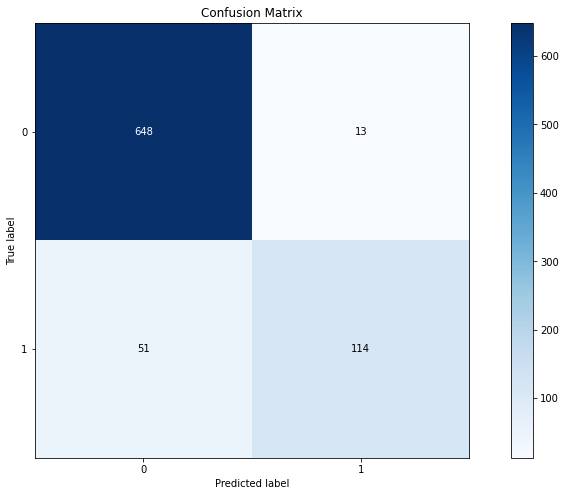

In [ ]:
#Confusion matrix
cm=confusion_matrix(y_test, y_predict)
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_predict, normalize=False,figsize=(15,8))

Wow, out of 826 samples, 64 are classified incorrectly.

In [ ]:
# Classification report
class_report= classification_report(y_test, y_predict)
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       661
           1       0.90      0.69      0.78       165

    accuracy                           0.92       826
   macro avg       0.91      0.84      0.87       826
weighted avg       0.92      0.92      0.92       826



Due to presence of low number of samples during training, the recall is low .i.e., 0.69 for class 1 compared to class 0.

## AUC- ROC curve
AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s. By analogy, the Higher the AUC, the better the model is at distinguishing between customers who have purchased and not purchased.

The ROC curve is plotted with TPR (True Positive Rate) against the FPR(False Positive Rate) where TPR is on the y-axis and FPR is on the x-axis.

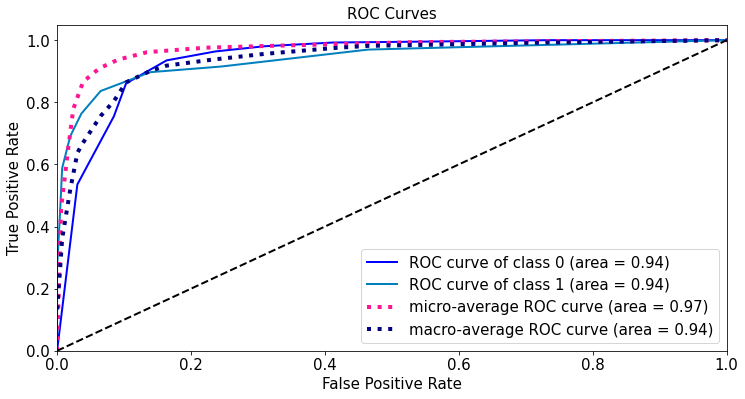

In [ ]:
#ROC_AUC curve
# Plot ROC curve
skplt.metrics.plot_roc(y_test, y_pred_prob, figsize = (12,6), text_fontsize = 15, title_fontsize = 15,
                      cmap = 'winter')
plt.show()

Insights:
* Great, the bagging classifier performing well with AUC score of 0.94.

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_model = RandomForestClassifier()

# Fit model on training data
rf_model.fit(x_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Accuracy of the model
rf_score=rf_model.score(x_train_scaled, y_train)
print('Accuracy of the trained rf_model :', round(rf_score, 3))

Accuracy of the trained rf_model : 1.0


### Random Foreset classifier performance on test data

In [ ]:
#model prediction
y_predict_rf= rf_model.predict(x_test_scaled)
y_pred_prob_rf = rf_model.predict_proba(x_test_scaled)
y_predict_rf

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

### Random forest classifier model evaluation

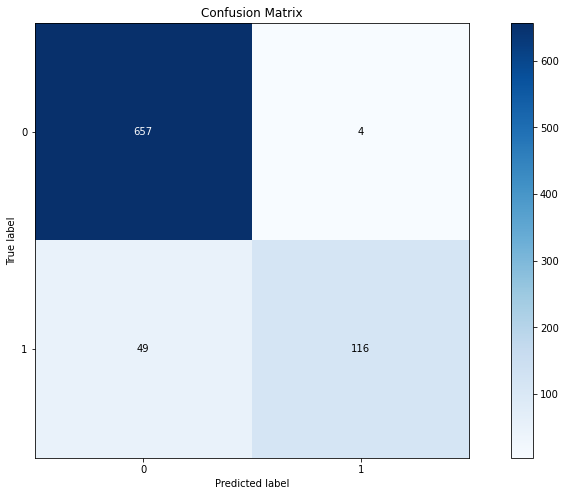

In [ ]:
#Confusion matrix
cm=confusion_matrix(y_test, y_predict_rf)
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_predict_rf, normalize=False,figsize=(15,8))

Out of 826 samples, 53 samples are classified incorrectly.

In [ ]:
# Classification report
class_report= classification_report(y_test, y_predict_rf)
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       661
           1       0.97      0.70      0.81       165

    accuracy                           0.94       826
   macro avg       0.95      0.85      0.89       826
weighted avg       0.94      0.94      0.93       826



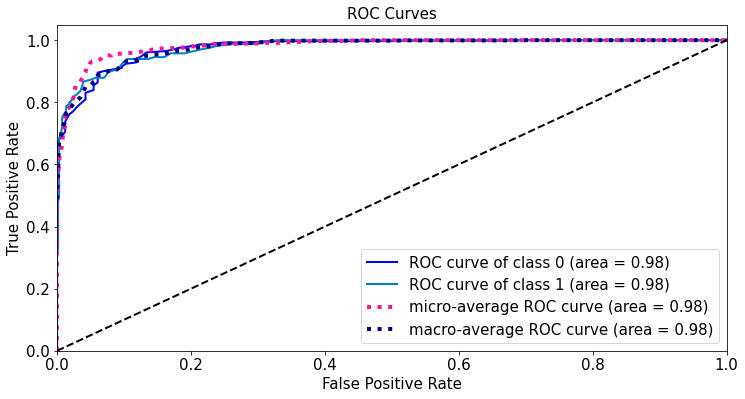

In [ ]:
#ROC_AUC curve
# Plot ROC curve
skplt.metrics.plot_roc(y_test, y_pred_prob_rf, figsize = (12,6), text_fontsize = 15, title_fontsize = 15,
                      cmap = 'winter')
plt.show()

Insights:
* AUC of 0.98 means the model is making best guesses. It seems Random forest classifier is not sensitive to the imbalanced data.

**Decision tree classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt_model = DecisionTreeClassifier()

# Fit model on training data
dt_model.fit(x_train_scaled, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Accuracy of the model
dt_score=dt_model.score(x_train_scaled, y_train)
print('Accuracy of the trained dt_model :', round(dt_score, 3))

Accuracy of the trained dt_model : 1.0


### Decision tree classifier performance on test data

In [ ]:
#model prediction
y_predict_dt= dt_model.predict(x_test_scaled)
y_pred_prob_dt = dt_model.predict_proba(x_test_scaled)
y_predict_dt

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

### Decision tree classifier model evaluation

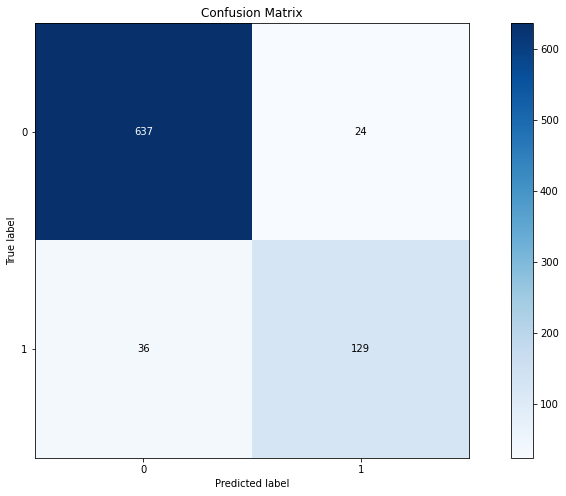

In [ ]:
#Confusion matrix
cm=confusion_matrix(y_test, y_predict_dt)
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_predict_dt, normalize=False,figsize=(15,8))

Out of 826 samples, 60 samples are classified incorrectly.

In [ ]:
#Classification report
class_report= classification_report(y_test, y_predict_dt)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       661
           1       0.84      0.78      0.81       165

    accuracy                           0.93       826
   macro avg       0.89      0.87      0.88       826
weighted avg       0.93      0.93      0.93       826



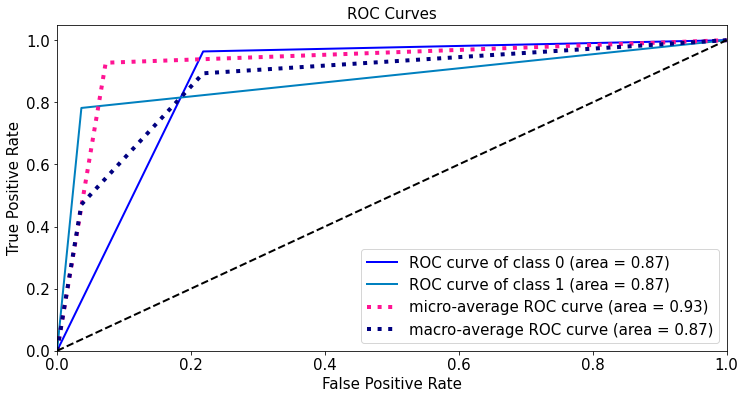

In [ ]:
#ROC_AUC curve
# Plot ROC curve
skplt.metrics.plot_roc(y_test, y_pred_prob_dt, figsize = (12,6), text_fontsize = 15, title_fontsize = 15,
                      cmap = 'winter')
plt.show()

Insights:
* It appears the Decision tree classifier is making good guesses with AUC score of 0.87.

**Model performance improvement - Bagging**

* AUC score is the best metric in evaluating Bagging model as it gives high accurate results especially for imbalanced data.           
* Random Forest model is performing well among all models with AUC score of 0.97 followed by Bagging classifier with AUC score of 0.94.    
* Model performance can be improved by hyperparameter tuning & balancing the classes using sampling techniques like SMOTE.  

**Model building - Boosting**


We are building 4 Boosting models for this task:
* Adaboost Classifier    
* Gradient boost        
* XGboost        
* Stacking classifier    

**Adaboost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Adaboost Classifier
ada_model = AdaBoostClassifier()

# Fit model on training data
ada_model.fit(x_train_scaled, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
#Accuracy of the model
ada_score=ada_model.score(x_train_scaled, y_train)
print('Accuracy of the trained ad_model :', round(ada_score, 3))

Accuracy of the trained ad_model : 0.856


### Adaboost classifier performance on test data

In [ ]:
#model prediction
y_predict_ad= ada_model.predict(x_test_scaled)
y_pred_prob_ad = ada_model.predict_proba(x_test_scaled)
y_predict_ad

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

### Adaboost classifier model evaluation

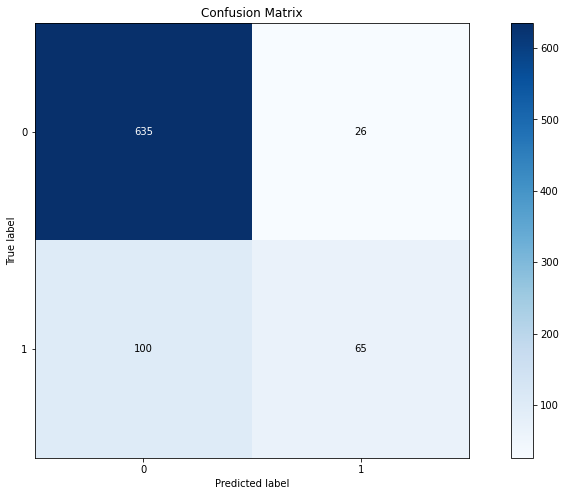

In [ ]:
#Confusion matrix
cm=confusion_matrix(y_test, y_predict_ad)
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_predict_ad, normalize=False,figsize=(15,8))

Out of 826 samples, 126 samples are classified incorrectly.

In [ ]:
#Classification report
class_report= classification_report(y_test, y_predict_ad)
print(class_report)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       661
           1       0.71      0.39      0.51       165

    accuracy                           0.85       826
   macro avg       0.79      0.68      0.71       826
weighted avg       0.83      0.85      0.83       826



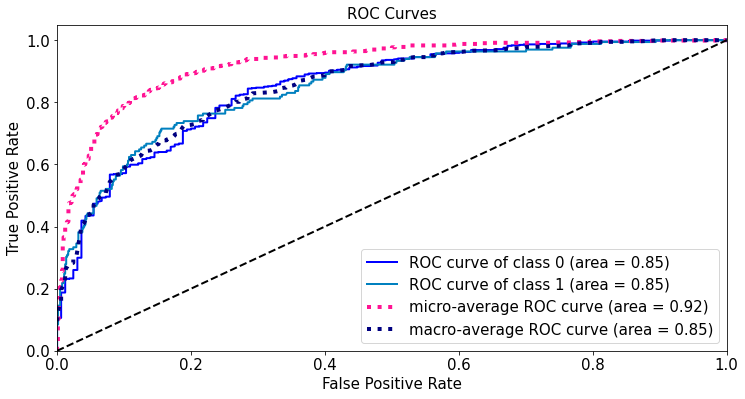

In [ ]:
#ROC_AUC curve
# Plot ROC curve
skplt.metrics.plot_roc(y_test, y_pred_prob_ad, figsize = (12,6), text_fontsize = 15, title_fontsize = 15,
                      cmap = 'winter')
plt.show()

Insights:
* It seems the Adaboost classifier is making good guesses with AUC score of 0.85.

**Gradient boost**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient boost Classifier
grad_model = GradientBoostingClassifier()

# Fit model on training data
grad_model.fit(x_train_scaled, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
#Accuracy of the model
grad_score=grad_model.score(x_train_scaled, y_train)
print('Accuracy of the trained grad_model :', round(grad_score, 3))

Accuracy of the trained grad_model : 0.897


## Gradient boosting classifier performance on test data

In [ ]:
#model prediction
y_predict_grd= grad_model.predict(x_test_scaled)
y_pred_prob_grd = grad_model.predict_proba(x_test_scaled)
y_predict_grd

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

### Gradient boosting classifier model evaluation

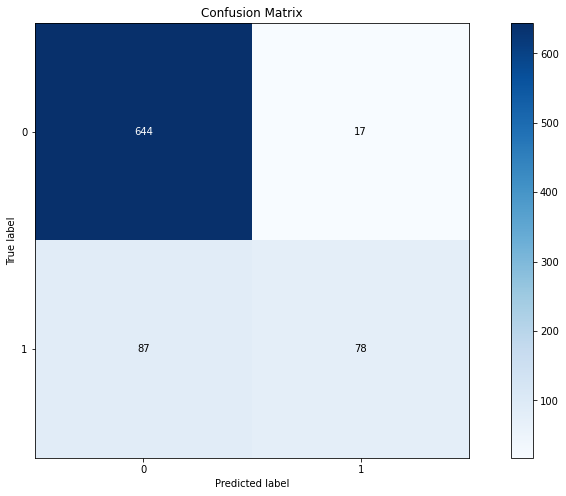

In [ ]:
#Confusion matrix
cm=confusion_matrix(y_test, y_predict_grd)
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_predict_grd, normalize=False,figsize=(15,8))

Out of 826 samples, 104 samples are classified incorrectly.

In [ ]:
#Classification report
class_report= classification_report(y_test, y_predict_grd)
print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       661
           1       0.82      0.47      0.60       165

    accuracy                           0.87       826
   macro avg       0.85      0.72      0.76       826
weighted avg       0.87      0.87      0.86       826



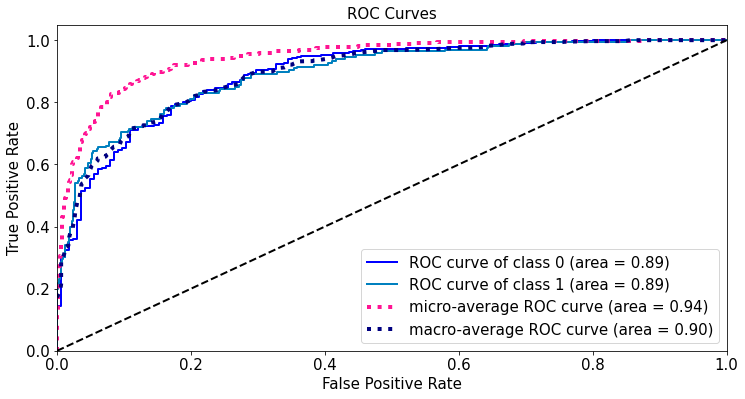

In [ ]:
#ROC_AUC curve
# Plot ROC curve
skplt.metrics.plot_roc(y_test, y_pred_prob_grd, figsize = (12,6), text_fontsize = 15, title_fontsize = 15,
                      cmap = 'winter')
plt.show()

Insights:

It seems the Gradient boosting classifier is making good guesses with AUC score of 0.89.

**XGBoost**

In [ ]:
from xgboost import XGBClassifier

# XGB Classifier
xgb_model = XGBClassifier()

# Fit model on training data
xgb_model.fit(x_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#Accuracy of the model
xgb_score=xgb_model.score(x_train_scaled, y_train)
print('Accuracy of the trained xgb_model :', round(xgb_score, 3))

Accuracy of the trained xgb_model : 0.884


XGB classifier performance on test data

In [ ]:
#model prediction
y_predict_xgb= xgb_model.predict(x_test_scaled)
y_pred_prob_xgb = xgb_model.predict_proba(x_test_scaled)
y_predict_xgb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

### XGB classifier model evaluation

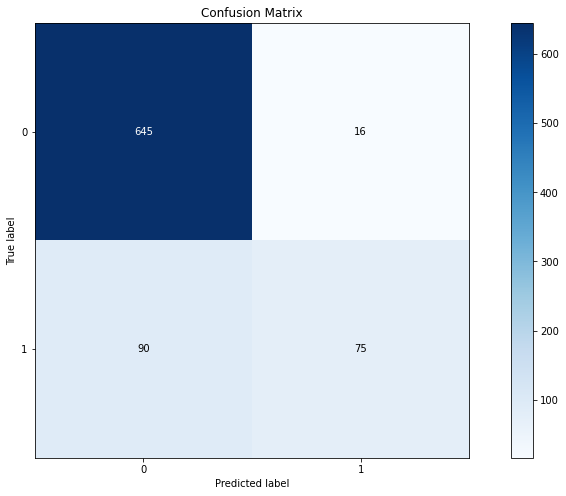

In [ ]:
#Confusion matrix
cm=confusion_matrix(y_test, y_predict_xgb)
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_predict_xgb, normalize=False,figsize=(15,8))

Out of 826 samples, 106 samples are classified incorrectly.

In [ ]:
#Classification report
class_report= classification_report(y_test, y_predict_xgb)
print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       661
           1       0.82      0.45      0.59       165

    accuracy                           0.87       826
   macro avg       0.85      0.72      0.76       826
weighted avg       0.87      0.87      0.86       826



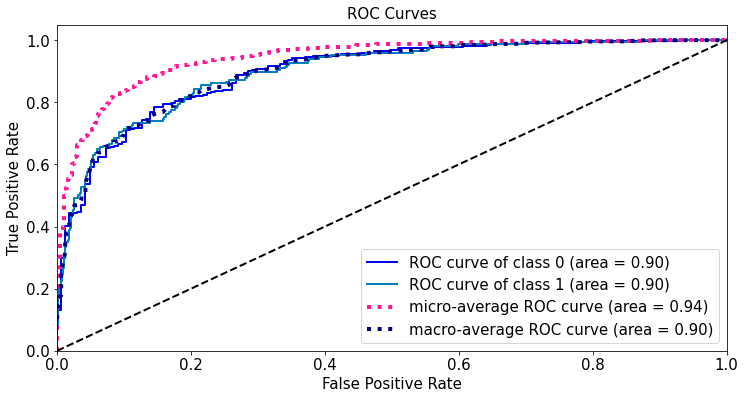

In [ ]:
#ROC_AUC curve
# Plot ROC curve
skplt.metrics.plot_roc(y_test, y_pred_prob_xgb, figsize = (12,6), text_fontsize = 15, title_fontsize = 15,
                      cmap = 'winter')
plt.show()

Insights:

* XGB model performance is great with AUC score of 0.90.

**Stacking classifier**

In [ ]:
from sklearn.ensemble import StackingClassifier

# Using base estimator as Random forest
estimators = [ ('rf', RandomForestClassifier(n_estimators=10, random_state=42)) ]

# Stacking Classifier
stack_model = StackingClassifier(estimators = estimators)

# Fit model on training data
stack_model.fit(x_train_scaled, y_train)

StackingClassifier(cv=None,
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                     

In [ ]:
#Accuracy of the model
stack_score=stack_model.score(x_train_scaled, y_train)
print('Accuracy of the trained stack_model :', round(stack_score, 3))

Accuracy of the trained stack_model : 0.998


### Stacking classifier performance on test data

In [ ]:
#model prediction
y_predict_stack= stack_model.predict(x_test_scaled)
y_pred_prob_stack = stack_model.predict_proba(x_test_scaled)
y_predict_stack

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

### Stacking classifier model evaluation

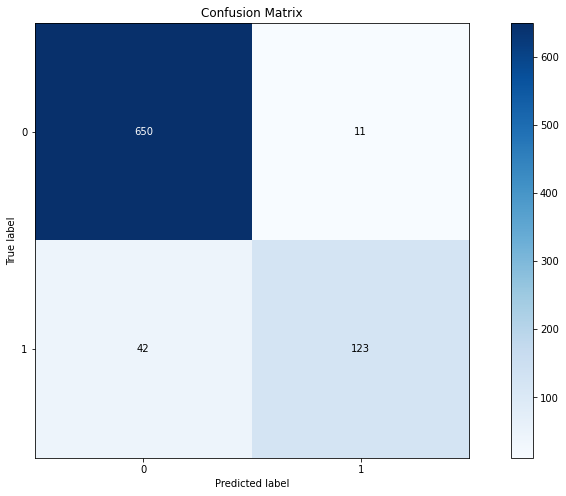

In [ ]:
#Confusion matrix
cm=confusion_matrix(y_test, y_predict_stack)
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_predict_stack, normalize=False,figsize=(15,8))

Out of 826 samples, 53 samples are classified incorrectly.

In [ ]:
#Classification report
class_report= classification_report(y_test, y_predict_stack)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       661
           1       0.92      0.75      0.82       165

    accuracy                           0.94       826
   macro avg       0.93      0.86      0.89       826
weighted avg       0.94      0.94      0.93       826



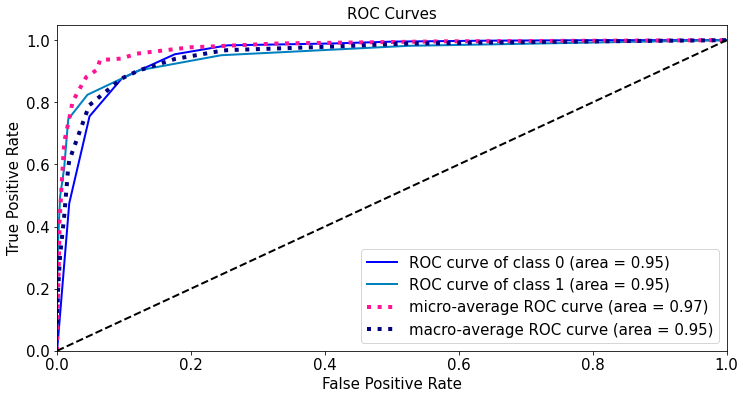

In [ ]:
#ROC_AUC curve
# Plot ROC curve
skplt.metrics.plot_roc(y_test, y_pred_prob_stack, figsize = (12,6), text_fontsize = 15, title_fontsize = 15,
                      cmap = 'winter')
plt.show()

Insights:
* Great, the Stacking classifier is performing well with AUC score of 0.95.

**Model performance improvement - Boosting**

* AUC score is the best metric in evaluating Boosting model as it gives high accurate results especially for imbalanced data.           
* Stacking classifier model is performing well among all models with AUC score of 0.95 followed by XGB classifier with AUC score of 0.90.    
* Model performance can be improved by hyperparameter tuning & balancing the classes using sampling techniques like SMOTE. 

**Model performance evaluation**

In [ ]:
Results={
    'Model':['BaggingClassifier','Random Forest','Decision tree', 'Adaboost', 'XGBoost','Gradientboost','StackingClassfier'],
    'f1-score(weighted)':[0.92, 0.93, 0.93, 0.83, 0.86, 0.86, 0.93],
    'AUC':[0.94, 0.98, 0.87, 0.85, 0.89, 0.9, 0.95]
}

results_df=pd.DataFrame(Results)
# Sort_values by AUC
results_df = results_df.sort_values(by = ['AUC'], ascending=False).reset_index(drop = True)
results_df

,Model,f1-score(weighted),AUC
0,Random Forest,0.93,0.98
1,StackingClassfier,0.93,0.95
2,BaggingClassifier,0.92,0.94
3,Gradientboost,0.86,0.90
4,XGBoost,0.86,0.89
5,Decision tree,0.93,0.87
6,Adaboost,0.83,0.85


Insights:
* Random Forest is best with AUC score of 0.98 among all Bagging & Boosting models.
* Stacking Classifier is 2nd best with AUC score of 0.95 among all Bagging & Boosting models.
* Adaboost is least performance wise with AUC score of 0.85.

**Actionable Insights & Recommendations**

* Try to focus business in CityTier 1 as it has high customer base.
* Since married people are more likely to buy a package, so introduce Couple friendly packages.
* Introduce best packages based on monthly income & occupation.